In [1]:
library("zoo")                        # Load zoo package
library(forecast)
library(ggplot2)
library(astsa)
library(aTSA)
library(xts)
library(plotly)
library(TSstudio)
library(MLmetrics)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'astsa'


The following object is masked from 'package:forecast':

    gas



Attaching package: 'aTSA'


The following object is masked from 'package:forecast':

    forecast


The following object is masked from 'package:graphics':

    identify



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'MLmetrics'


The following object is masked from 'package:base':

    Recall




## We will model on a 1 hour timestep, inclusion of Seasonal components on the order of 100+ timesteps proved difficult

In [2]:
Data <- read.csv("C:\\Users\\conal\\Desktop\\MCM\\Practicum\\data\\ETH,gas,usage merged_60min 11-26 to 01-26.csv")

In [3]:
FullData <- na.locf(Data)
tail(FullData)

,datetime,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1483,2022-01-26 18:00:00,30039394,16307131,2576.415,192.7273,624.3503,178.1387,0.5428974
1484,2022-01-26 19:00:00,30019397,16767827,2631.031,267.7959,910.0090,247.4973,0.5585605
1485,2022-01-26 20:00:00,30014227,16442355,2510.596,246.0085,1519.3978,222.6770,0.5478010
1486,2022-01-26 21:00:00,30019470,16624025,2478.345,174.1559,569.1457,162.0970,0.5537652
1487,2022-01-26 22:00:00,30025820,16567251,2425.639,159.4330,577.7036,147.5472,0.5517893
1488,2022-01-26 23:00:00,30015798,17513092,2461.215,193.7382,662.0043,178.6380,0.5834066


In [4]:
Data <- FullData[0:1440,]
Test <- FullData[1441:1488,]
tail(Test)

,datetime,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1483,2022-01-26 18:00:00,30039394,16307131,2576.415,192.7273,624.3503,178.1387,0.5428974
1484,2022-01-26 19:00:00,30019397,16767827,2631.031,267.7959,910.0090,247.4973,0.5585605
1485,2022-01-26 20:00:00,30014227,16442355,2510.596,246.0085,1519.3978,222.6770,0.5478010
1486,2022-01-26 21:00:00,30019470,16624025,2478.345,174.1559,569.1457,162.0970,0.5537652
1487,2022-01-26 22:00:00,30025820,16567251,2425.639,159.4330,577.7036,147.5472,0.5517893
1488,2022-01-26 23:00:00,30015798,17513092,2461.215,193.7382,662.0043,178.6380,0.5834066


In [5]:
apply(Data, 2, function(x) any(is.na(x)))

datetime         gas_limit          gas_used              Open 
            FALSE             FALSE             FALSE             FALSE 
    avg_gas_price     max_gas_price     min_gas_price block_utilisation 
            FALSE             FALSE             FALSE             FALSE

In [6]:
Timestamp = Data$timestamp_y
gas_limit  = Data$gas_limit
gas_used  = Data$gas_used
Open  = Data$Open
avg_gas_price  = Data$avg_gas_price
max_gas_price  = Data$max_gas_price
min_gas_price  = Data$min_gas_price
block_utilisation  = Data$block_utilisation

min_gas_price_Test  = Test$min_gas_price

Series: min_gas_price 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1     ma2
      0.7420  -1.1963  0.2148
s.e.  0.0327   0.0442  0.0414

sigma^2 = 1070:  log likelihood = -7060.02
AIC=14128.03   AICc=14128.06   BIC=14149.12


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)
Q* = 7.7924, df = 7, p-value = 0.3513

Model df: 3.   Total lags used: 10



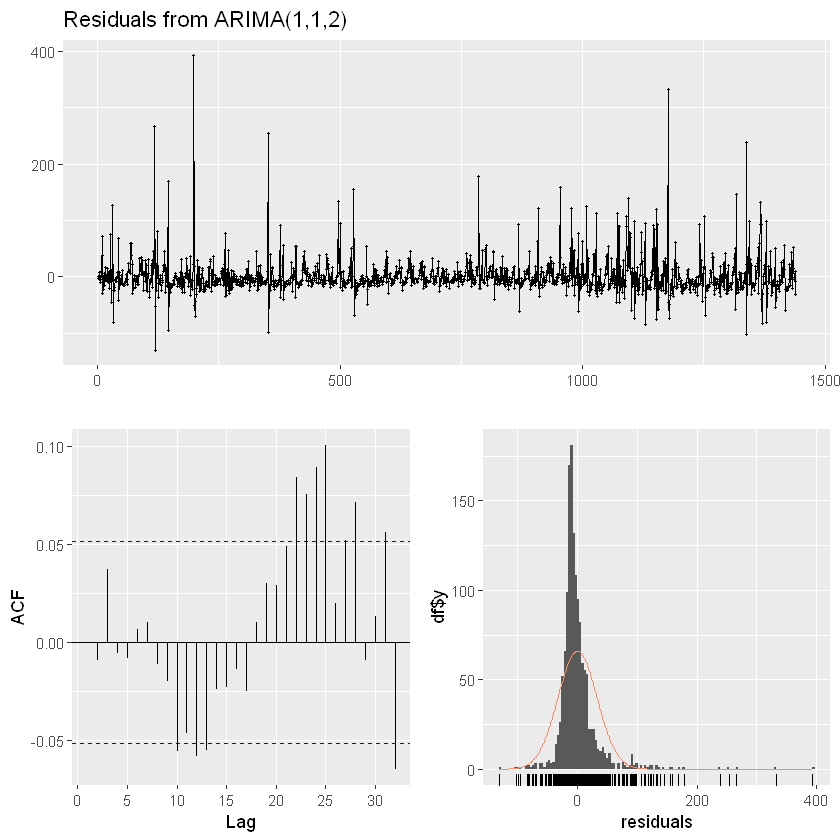

In [7]:
fit <- auto.arima(min_gas_price)
auto.arima(min_gas_price)
checkresiduals(fit)


AutoARIMA does not seem to detect seasonality, forcing with arguments does not seem to work either

P=2 and P=3 SARIMA models are similar 

initial  value 3.936828 
iter   2 value 3.648166
iter   3 value 3.543245
iter   4 value 3.529442
iter   5 value 3.504635
iter   6 value 3.486229
iter   7 value 3.481993
iter   8 value 3.479638
iter   9 value 3.479199
iter  10 value 3.479063
iter  11 value 3.478964
iter  12 value 3.478962
iter  12 value 3.478962
iter  12 value 3.478962
final  value 3.478962 
converged
initial  value 3.480615 
iter   2 value 3.480535
iter   3 value 3.480474
iter   4 value 3.480474
iter   5 value 3.480473
iter   6 value 3.480472
iter   6 value 3.480472
iter   6 value 3.480472
final  value 3.480472 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    include.mean = !no.constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
          ma1      ma2      ma3     sar1     sar2     sar3     sma1
      -0.5354  -0.1808  -0.1340  -0.0201  -0.0113  -0.0394  -0.9379
s.e.   0.0264   0.0325   0.0259   0.0288   0.0289   0.0289   0.0135

sigma^2 estimated as 1014:  log likelihood = -6932.67,  aic = 13881.33

$degrees_of_freedom
[1] 1408

$ttable
     Estimate     SE  t.value p.value
ma1   -0.5354 0.0264 -20.2611  0.0000
ma2   -0.1808 0.0325  -5.5669  0.0000
ma3   -0.1340 0.0259  -5.1767  0.0000
sar1  -0.0201 0.0288  -0.6971  0.4859
sar2  -0.0113 0.0289  -0.3912  0.6957
sar3  -0.0394 0.0289  -1.3669  0.1719
sma1  -0.9379 0.0135 -69.3903  0.0000

$AIC
[1] 9.810129

$AICc
[1] 9.810186

$BIC
[1] 9.839839


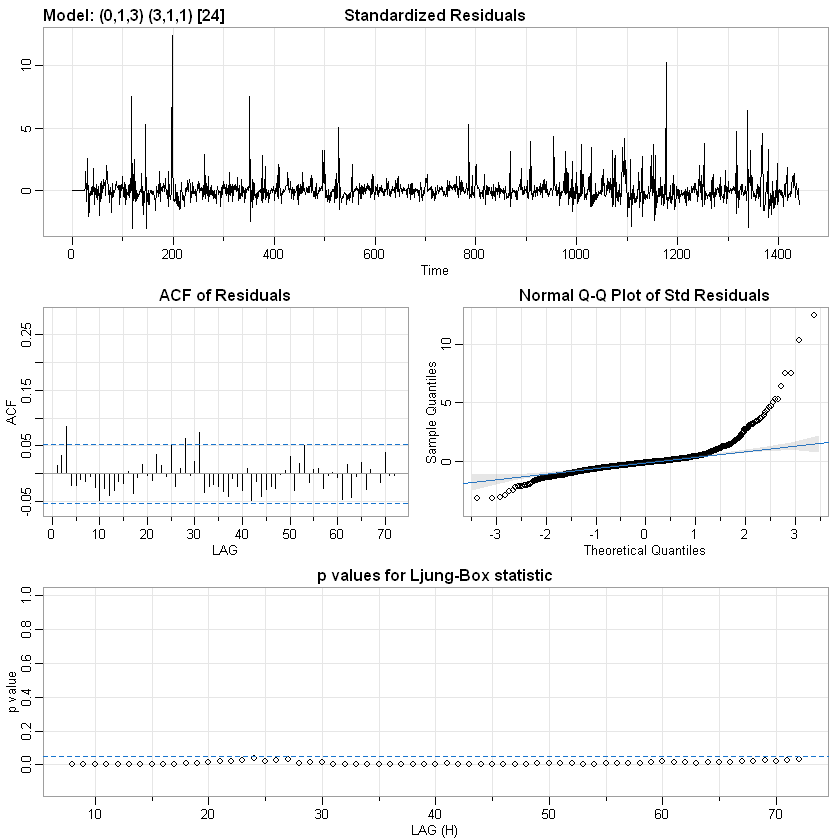

In [8]:
sarima(min_gas_price, 0,1,3,3,1,1,24)


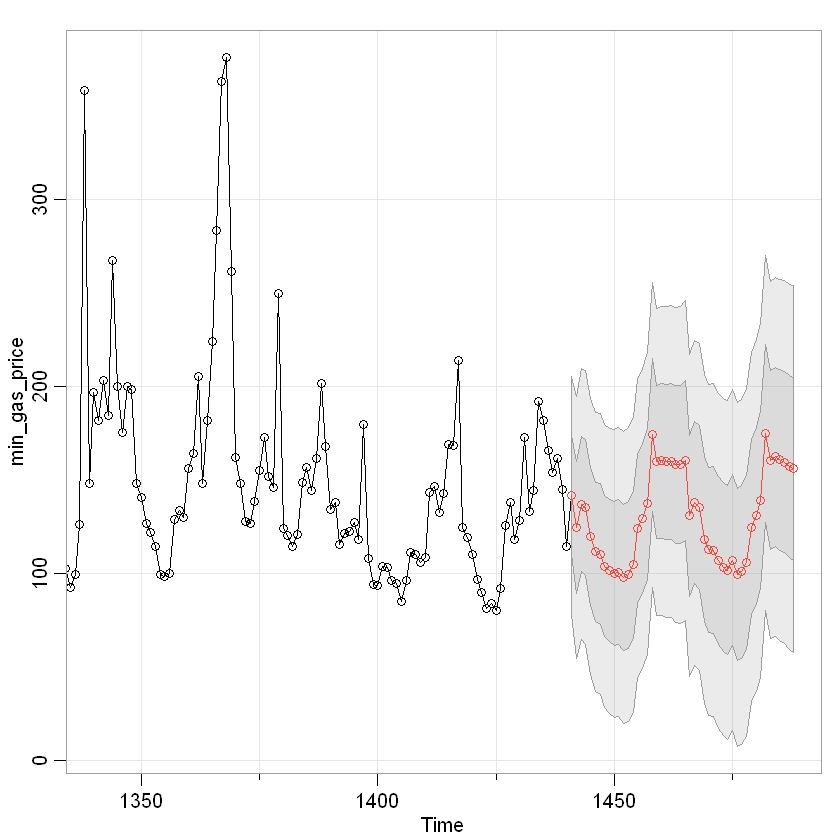

In [9]:
forecast = sarima.for(min_gas_price, 48, 0,1,3,3,1,1,24)

In [10]:
Test_ts <- xts(Test$min_gas_price, order.by=(as.POSIXct(Test$datetime, format="%Y-%m-%d %H:%M:%S")))



In [11]:
Forecast_ts <- xts(forecast$pred, start=2022-01-25, order.by=(as.POSIXct(Test$datetime, format="%Y-%m-%d %H:%M:%S")))

In [12]:
mean((Test_ts - Forecast_ts)^2)

[1] 851.5795

In [13]:
MAPE(Forecast_ts, Test_ts)

[1] 0.1561868

In [14]:
MAE(Forecast_ts, Test_ts)

[1] 21.94642

In [20]:
merged_ts <- merge(Test_ts,Forecast_ts,join='inner')

In [16]:
RMSE(Forecast_ts, Test_ts)

[1] 29.18184

In [30]:
mseries <- cbind(merged_ts) # mseries is a xts object with multiple variables


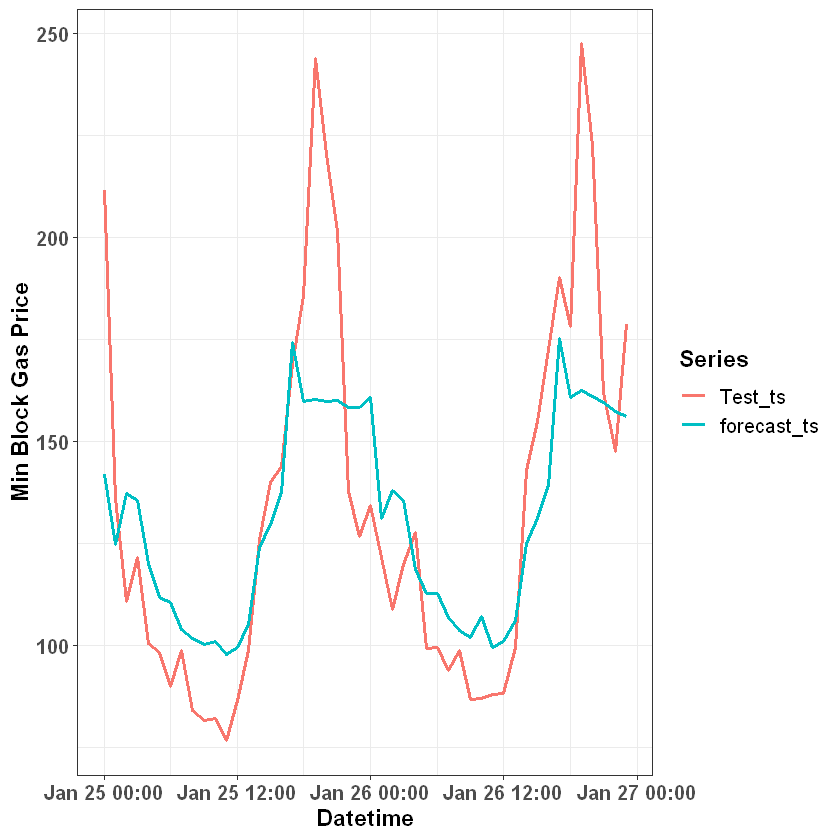

In [64]:
plot <- autoplot.zoo(mseries, facets=NULL)
plot + 
theme_bw() + 
xlab("Datetime")+ 
ylab("Min Block Gas Price")+
theme(axis.text=element_text(size=12, face="bold"),
        axis.title=element_text(size=14,face="bold"))+
theme(legend.text = element_text(size=12))+
theme(legend.title = element_text(size=14, face="bold"))+
geom_line(size = 1)